<a href="https://colab.research.google.com/github/kaviya2478/Stock_Movement_Analysis_Sentiment_Based_on_Telegram_/blob/main/Stock_Movement_Analysis_Based_on_Social_Media_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Data Collection**

In [1]:
!pip install telethon nltk pandas matplotlib seaborn wordcloud yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.2/620.2 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for telethon: filename=Telethon-1.37.0-py3-none-any.whl size=694366 sha256=549c85624cf21da58ffaa016708e29da39193fba766b4b6bfba2d6a6dc1a833a
  Stored in directory: /root/.cache/pip/wheels/8b/3c/0a/91d35499092d78120d71039a156b5c450f3ca00f95b4d594a4
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=7012eca8c82a6c6d051972d6242a26d0efd18579d58b56c24a0a873e7795d65a
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built telethon pyaes


In [2]:
!pip install textblob
!pip install vaderSentiment pandas matplotlib
!pip install emoji
!pip install urlextract
!pip install gensim pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.9 MB/s eta 0:00:00


asyncio is used for handling asynchronous tasks, allowing real-time data collection from Telegram without blocking the code execution.

In [3]:
import asyncio


from telethon.sync import TelegramClient
import pandas as pd

# Replace with your own values from my.telegram.org
api_id = '28008377'  # Your API ID
api_hash = '4051eb68edda46c8ca6f12c9002f1714'  # Your API Hash
#phone_number = ''  # Your phone number registered with Telegram

# Create the client and connect
client = TelegramClient('session_name', api_id, api_hash)



In [4]:
import pandas as pd
import re
from emoji import demojize
from textblob import TextBlob
from urlextract import URLExtract
from datetime import datetime
from telethon import TelegramClient
import getpass
# Initialize URL extractor
extractor = URLExtract()

# Function to clean and preprocess messages
def clean_message(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove special characters, mentions (@username), hashtags, and newlines
    text = re.sub(r'\@\w+|\#|\n|\r', '', text)

    # Remove emojis
    text = demojize(text)

    # Convert text to lowercase for consistency
    text = text.lower()

    return text

# **2.Data Analysis & Feature Analysis**

In [6]:
# Function to extract hashtags from text
def extract_hashtags(text):
    # Find all hashtags in the text
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

# Async function to fetch and process messages
async def main():
    # Securely input your phone number without displaying it
    phone_number = getpass.getpass(prompt="Enter your phone number: ")

    # Initialize the Telegram Client
    client = TelegramClient('new_session_name', api_id, api_hash)
    await client.start(phone_number)

    print("Client Created")

    # Specify the channel username here
    channel_username = 'futures'  # Replace with actual Telegram channel

    # Fetch messages from the Telegram channel
    messages = await client.get_messages(channel_username, limit=5000)

    # Create a list to store message data
    messages_data = []

    if not messages:
        print("No messages found in the channel.")
        return

    for message in messages:
        if message.message:  # Process only if there is a message (text content)
            clean_text = clean_message(message.message)  # Clean the message
            hashtags = extract_hashtags(message.message)  # Extract hashtags

            # Add to the dataset
            messages_data.append({
                'id': message.id,
                'date': message.date.strftime('%Y-%m-%d'),
                'text': clean_text,
                'message_length': len(clean_text),
                'hashtags': hashtags,
            })

    # Create a DataFrame from the list
    df_messages = pd.DataFrame(messages_data)

    # Clean and preprocess the text data
    df_messages['text'] = df_messages['text'].apply(clean_message)

    # Handle Missing Values
    df_messages.dropna(subset=['text'], inplace=True)

    # Remove duplicates
    df_messages.drop_duplicates(subset=['text'], keep='first', inplace=True)

    # Optionally reset the index after dropping rows
    df_messages.reset_index(drop=True, inplace=True)

    # Display the cleaned DataFrame
    print(f"Total messages after cleaning: {len(df_messages)}")
    print(df_messages.head())  # Display the first few rows of the cleaned DataFrame

    # Save the cleaned DataFrame to a CSV file
    df_messages.to_csv('Stock_Movement.csv', index=False)
    print("Stock_Movement.csv saved successfully.")

# Run the main function in an existing event loop
async def run():
    await main()

# Execute the function
await run()

Enter your phone number: ··········
Please enter the code you received: 13509
Signed in successfully as Arunagiri Srinivasan; remember to not break the ToS or you will risk an account ban!
Client Created
Total messages after cleaning: 1433
     id        date                                               text  \
0  1535  2024-10-13  :high_voltage:china's deflation problems are g...   
1  1534  2024-10-13  :high_voltage:hedge funds are taking off bets ...   
2  1533  2024-10-12  :high_voltage:amd introduced a new chip that w...   
3  1532  2024-10-12  :high_voltage:china announced new economic sti...   
4  1531  2024-10-11  :high_voltage:tesla lost 8% after disappointin...   

   message_length hashtags  
0            1362       []  
1            1195       []  
2             993       []  
3            1533       []  
4            1507       []  
Stock_Movement.csv saved successfully.


In [7]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment based on compound polarity score
def classify_sentiment(polarity_scores):
    compound_score = polarity_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#  Load the CSV file containing Telegram messages
df_messages = pd.read_csv('Stock_Movement.csv')

# Replace missing text with an empty string
df_messages['text'] = df_messages['text'].fillna('')

# Perform sentiment analysis for each message and store results
df_messages['polarity'] = df_messages['text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Classify the sentiment type (positive, negative, neutral) based on polarity
df_messages['sentiment_type'] = df_messages['polarity'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Display the first few rows with text, polarity, and sentiment type
print(df_messages[['text', 'polarity', 'sentiment_type','id']].head(10))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text  polarity sentiment_type  \
0  :high_voltage:china's deflation problems are g...    0.7506       Positive   
1  :high_voltage:hedge funds are taking off bets ...   -0.9301       Negative   
2  :high_voltage:amd introduced a new chip that w...    0.6428       Positive   
3  :high_voltage:china announced new economic sti...    0.3567       Positive   
4  :high_voltage:tesla lost 8% after disappointin...    0.9501       Positive   
5  :high_voltage:blackrock hits record $11.5 tril...    0.9796       Positive   
6  :high_voltage:canadian bank td bank will pay c...   -0.3400       Negative   
7  :high_voltage:huawei has overtaken apple in ch...    0.5267       Positive   
8  :high_voltage:fed suffers split over the level...   -0.2263       Negative   
9  :high_voltage:s&p puts boeing's rating under r...   -0.6908       Negative   

     id  
0  1535  
1  1534  
2  1533  
3  1532  
4  1531  
5  1530  
6  1529  
7  1528  
8  1527  
9  1526 

In [8]:
from collections import Counter
import re

stock_keywords = {
    'AAPL': 'Apple stock',
    'TSLA': 'Tesla stock',
    'GOOG': 'Google stock',
    'MSFT': 'Microsoft stock',
    'AMZN': 'Amazon stock',
    'bullish': 'Positive market sentiment',
    'bearish': 'Negative market sentiment',
    'buy': 'Buy recommendation or positive sentiment',
    'sell': 'Sell recommendation or negative sentiment',
    'profit': 'Indication of gains or positive sentiment',
    'loss': 'Indication of losses or negative sentiment',
    'market': 'General market trend discussion',
    'stock': 'General stock discussion',
    'investment': 'Stock or market investment discussion',
    'short': 'Short-selling or negative sentiment',
    'hold': 'Hold recommendation or neutral sentiment',
    'RELIANCE': 'Reliance Industries Limited',
    'TATA': 'Tata Group',
    'TCS': 'Tata Consultancy Services Limited',
    'INFY': 'Infosys Limited',
    'bse' : 'Bomboy Stock Exchange',
    'war' : 'War',
    'nse' :'National stock exchange',
    'stock market' : 'Stock market',
    'market cap' : 'Market capitalization',
    'stock exchange' : 'Stock exchange',
    'stock price' : 'Stock price',
    'stock performance' : 'Stock performance',
    'price increase' : 'Price increase',
    'price decrease' : 'Price decrease',
    'crypto price' : 'Cryptocurrency price',
    'crypto market' : 'Cryptocurrency market',
    'cryptocurrency exchange' : 'Cryptocurrency exchange',
    'health care' : 'Health care',
    'Meta' : 'company of Facebook, Instagram, and WhatsApp',
    'VOW3' : 'Volkswagen Group',
    'BMW' : 'Bayerische Motoren Werke',
    'NFLX' : 'Netflix',
    'PYPL' : 'PayPal Holdings',
    'NIO' : 'Ningbo NIO Automobile Co., Ltd',
}

# Function to extract mentions of stock tickers or market trends from the text
def extract_stock_mentions(text, keywords):
    mentions = []
    for keyword in keywords:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):  # Match whole words only
            mentions.append(keyword)
    return mentions

In [9]:
# Apply the function to extract mentions from each message
df_messages['mentions'] = df_messages['text'].apply(lambda text: extract_stock_mentions(text, stock_keywords))

# Flatten the list of mentions and count the frequency of each keyword
all_mentions = [mention for mentions in df_messages['mentions'] for mention in mentions]
mentions_count = Counter(all_mentions)

# Display the frequency of each stock or market trend keyword
print("Frequency of Mentions for Specific Stocks or Market Trends:")
for keyword, count in mentions_count.items():
    print(f"{keyword}: {count}")

Frequency of Mentions for Specific Stocks or Market Trends:
market: 276
bullish: 34
bearish: 9
short: 39
war: 26
buy: 58
sell: 72
stock: 237
stock market: 51
investment: 56
profit: 64
stock exchange: 15
hold: 22
TSLA: 1
BMW: 2
loss: 24
stock price: 10
NIO: 1
Meta: 12
market cap: 32
MSFT: 1
INFY: 1
TATA: 50
bse: 29
RELIANCE: 21
TCS: 13
nse: 19
crypto market: 2
cryptocurrency exchange: 1
price increase: 1


# **3. Visualization & Reporting**

<ipython-input-10-45aa03158491>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(mentions_count.keys()), y=list(mentions_count.values()), palette=palette)


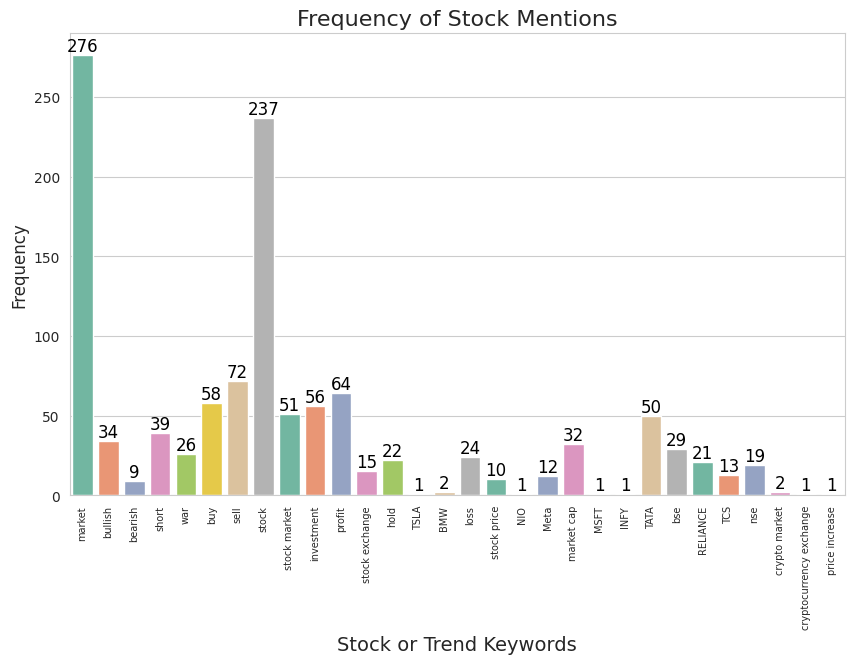

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Use a clean grid style
palette = sns.color_palette("Set2", n_colors=len(mentions_count))  # Create a palette with enough colors
bars = sns.barplot(x=list(mentions_count.keys()), y=list(mentions_count.values()), palette=palette)

# Annotate the bars with their values
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                  ha='center', va='bottom', fontsize=12, color='black')

plt.title('Frequency of Stock Mentions', fontsize=16)
plt.xlabel('Stock or Trend Keywords', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=10)
plt.show()


In [11]:
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocess the text
def preprocess(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = ''.join(char for char in text if char.isalpha() or char.isspace()).lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the messages
df_messages['processed_text'] = df_messages['text'].apply(preprocess)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df_messages['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_messages['processed_text']]

# Build the LDA model
num_topics = 10  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


# Display the topics
print("Identified Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Identified Topics:
Topic 1: 0.022*"chartincreasing" + 0.018*"coin" + 0.011*"oil" + 0.006*"market" + 0.005*"company" + 0.005*"stock" + 0.004*"new" + 0.004*"us" + 0.004*"price" + 0.004*"crude"
Topic 2: 0.017*"chartincreasing" + 0.013*"coin" + 0.013*"reports" + 0.010*"shares" + 0.006*"high" + 0.006*"recordbuttonus" + 0.005*"strong" + 0.005*"week" + 0.004*"consumer" + 0.004*"himanshu"
Topic 3: 0.014*"us" + 0.010*"rate" + 0.009*"market" + 0.009*"chartincreasing" + 0.007*"cut" + 0.007*"stocks" + 0.006*"rates" + 0.006*"price" + 0.006*"since" + 0.006*"interest"
Topic 4: 0.026*"chartincreasing" + 0.021*"coin" + 0.013*"crore" + 0.009*"india" + 0.009*"indian" + 0.008*"tata" + 0.008*"ipo" + 0.007*"market" + 0.007*"ltd" + 0.006*"company"
Topic 5: 0.039*"vv" + 0.039*"ventures" + 0.034*"via" + 0.033*"checkmarkbuttonpushpin" + 0.033*"channel" + 0.028*"powered" + 0.012*"owned" + 0.009*"breakout" + 0.009*"nikita" + 0.009*"poojary"
Topic 6: 0.016*"chartincreasing" + 0.013*"coin" + 0.011*"shares" + 0.006*

In [12]:
# Visualize the topics using pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization in the Jupyter Notebook
pyLDAvis.display(vis)

print(df_messages.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     id        date                                               text  \
0  1535  2024-10-13  :high_voltage:china's deflation problems are g...   
1  1534  2024-10-13  :high_voltage:hedge funds are taking off bets ...   
2  1533  2024-10-12  :high_voltage:amd introduced a new chip that w...   
3  1532  2024-10-12  :high_voltage:china announced new economic sti...   
4  1531  2024-10-11  :high_voltage:tesla lost 8% after disappointin...   

   message_length hashtags  polarity sentiment_type  \
0            1362       []    0.7506       Positive   
1            1195       []   -0.9301       Negative   
2             993       []    0.6428       Positive   
3            1533       []    0.3567       Positive   
4            1507       []    0.9501       Positive   

                         mentions  \
0                        [market]   
1  [bullish, bearish, short, war]   
2                        [market]   
3                         [short]   
4                           [buy]   

 

# **4. Recommendations**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing data for AAPL...


[*********************100%***********************]  1 of 1 completed
<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


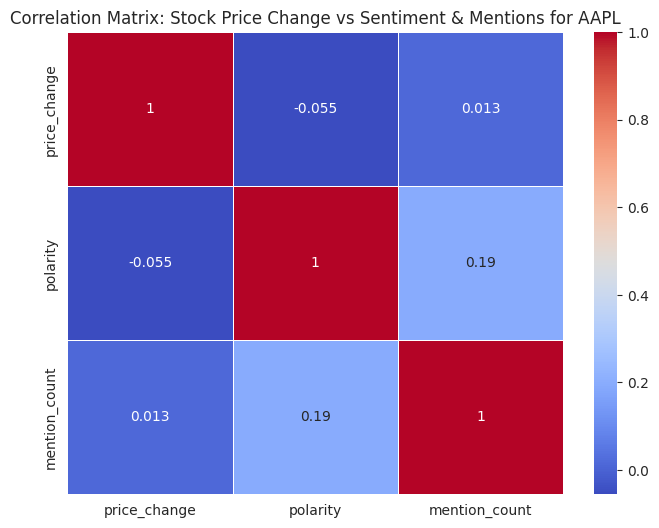

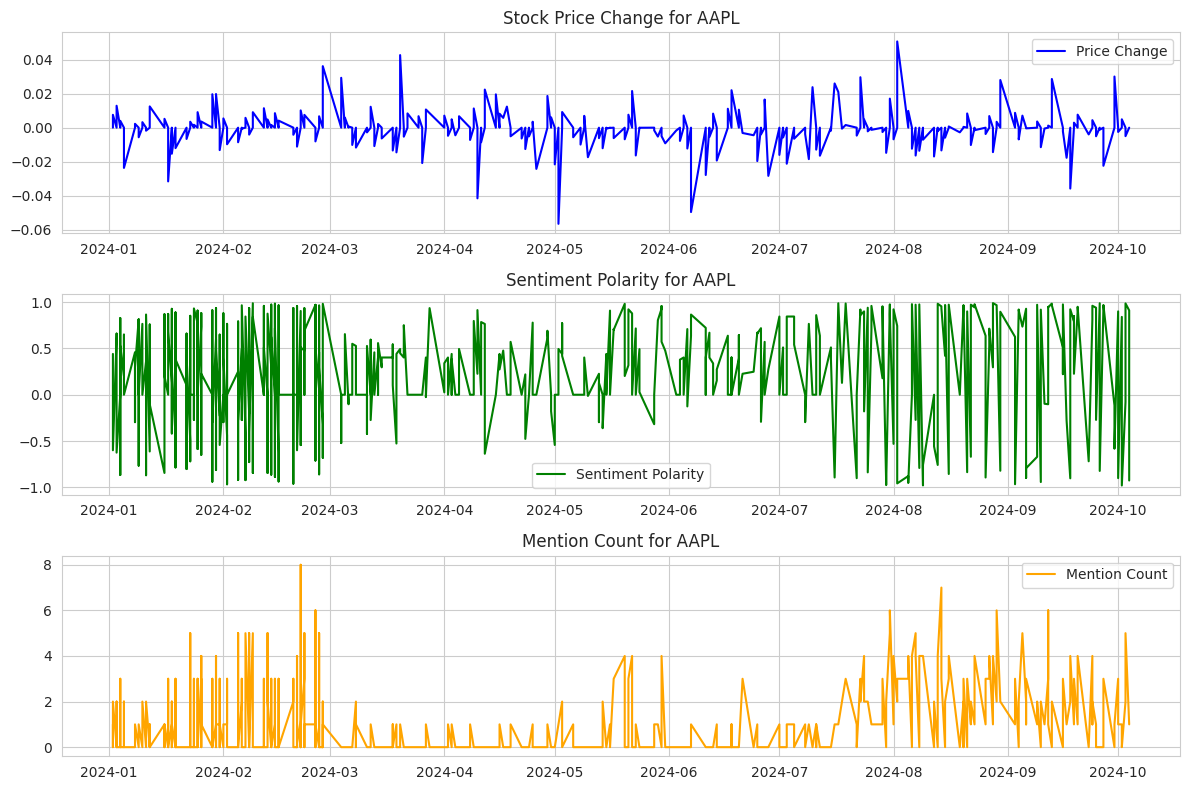

[*********************100%***********************]  1 of 1 completed

Processing data for TSLA...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


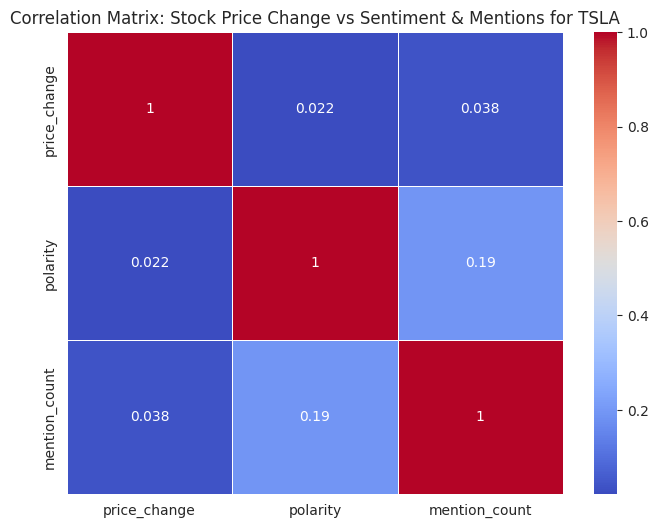

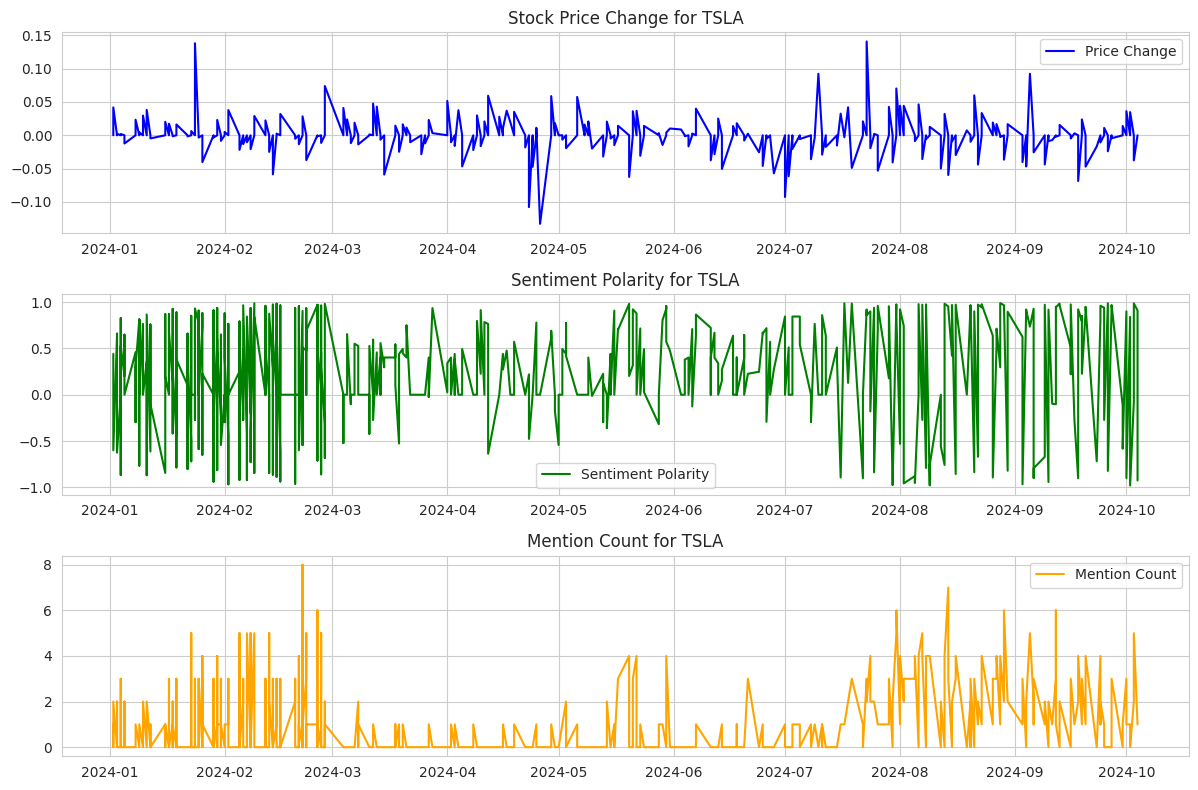

Processing data for GOOG...


[*********************100%***********************]  1 of 1 completed
<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


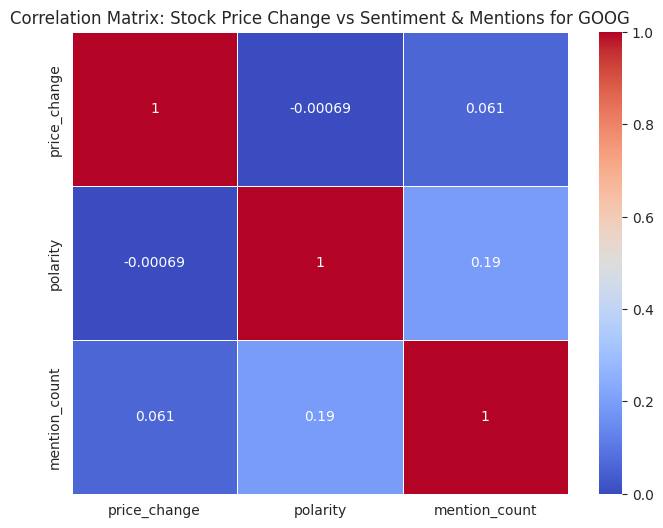

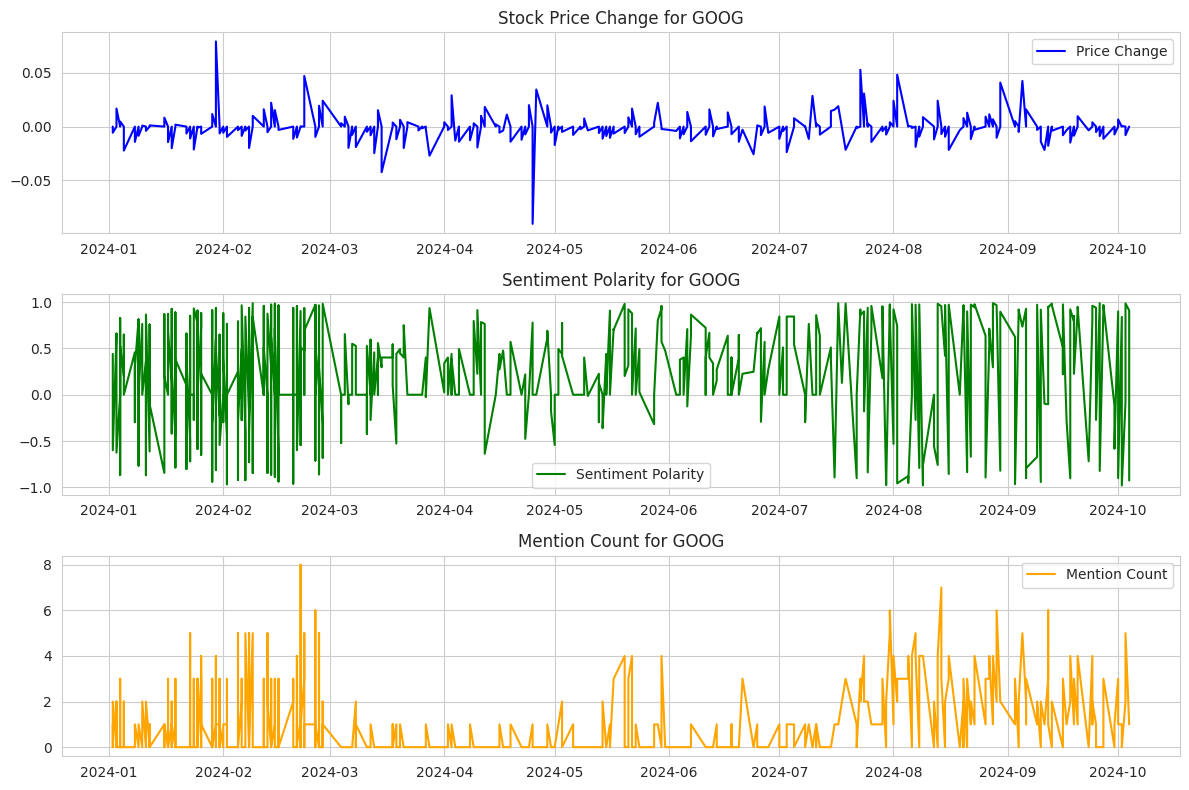

[*********************100%***********************]  1 of 1 completed

Processing data for MSFT...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


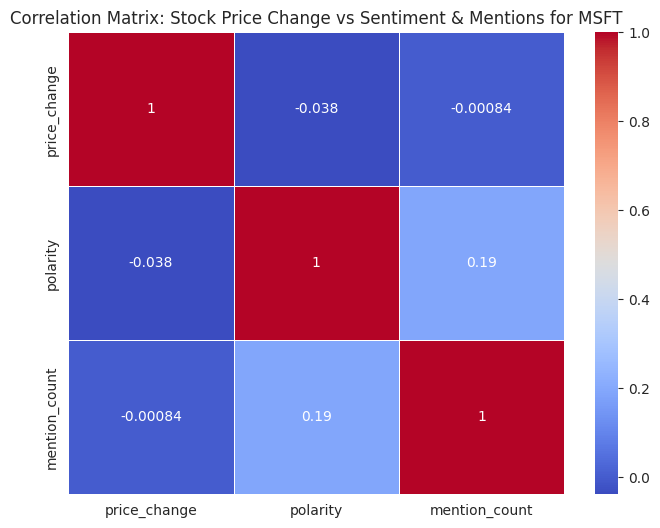

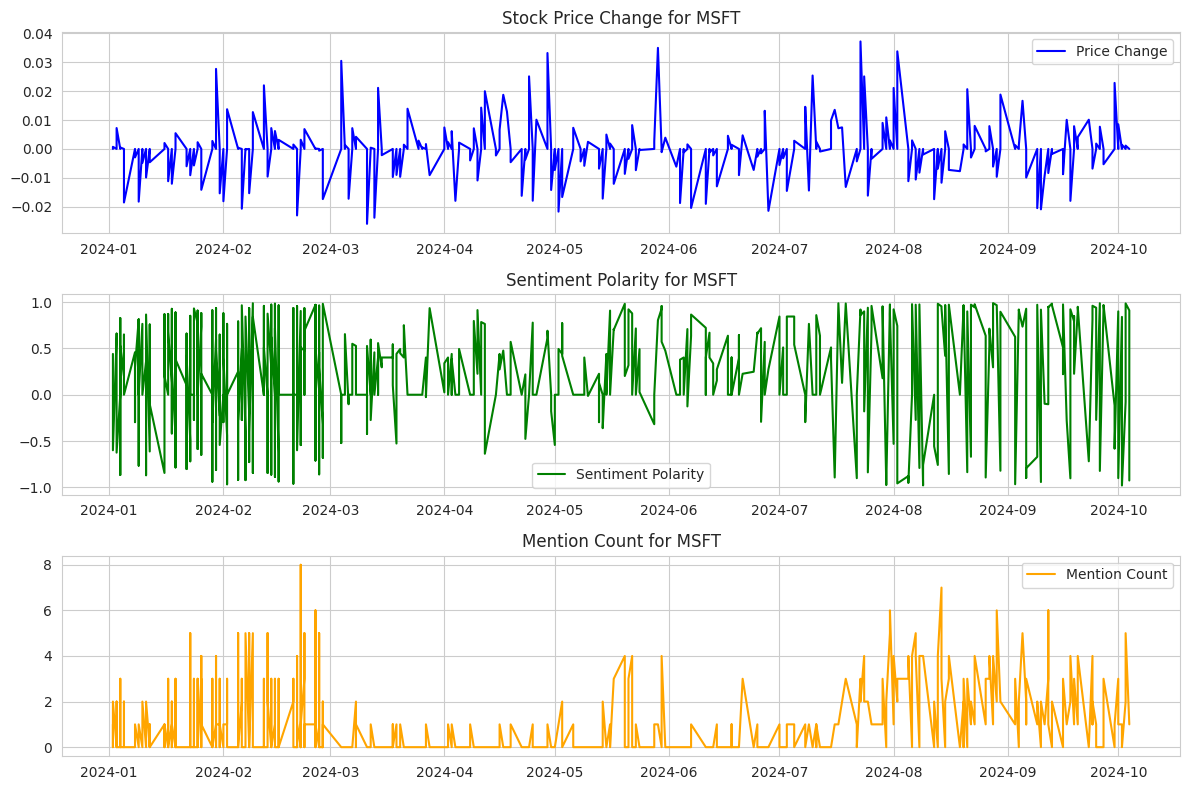

[*********************100%***********************]  1 of 1 completed

Processing data for AMZN...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


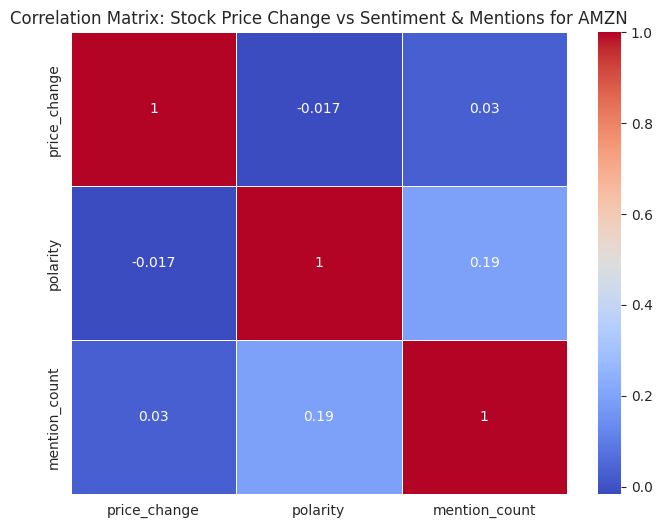

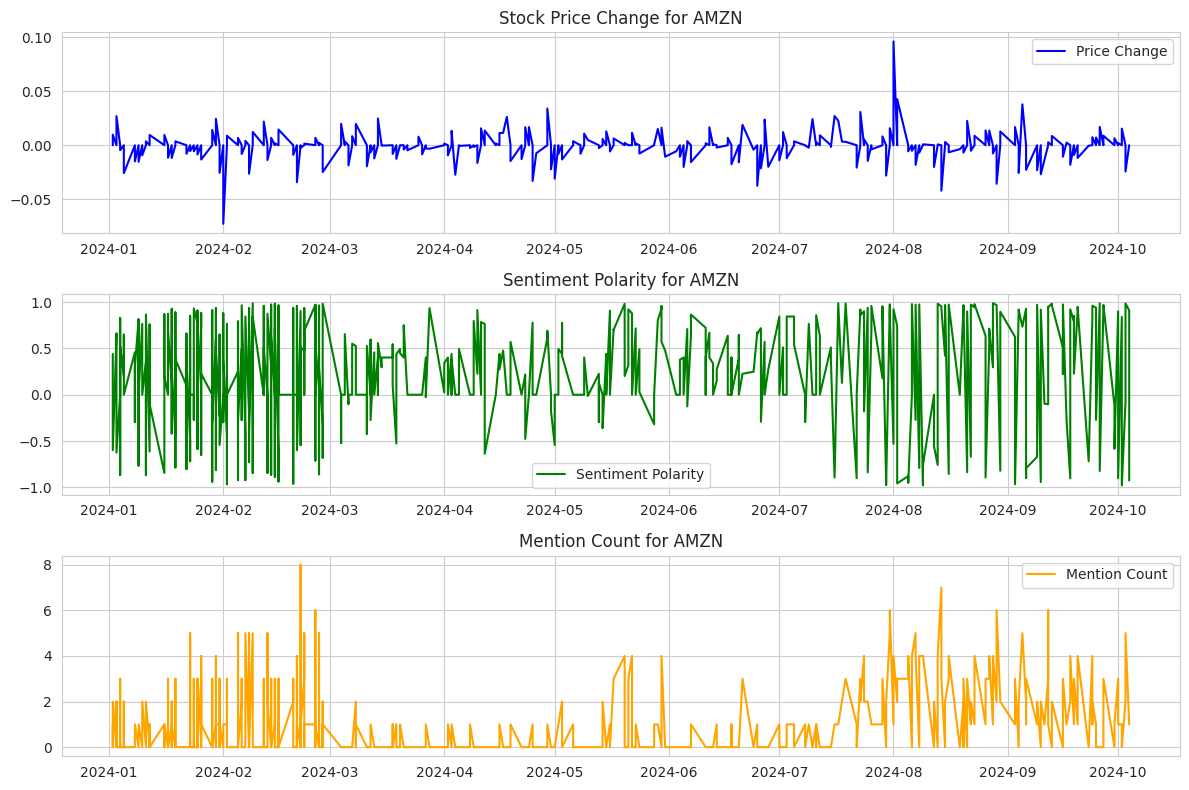

Processing data for RELIANCE...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RELIANCE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


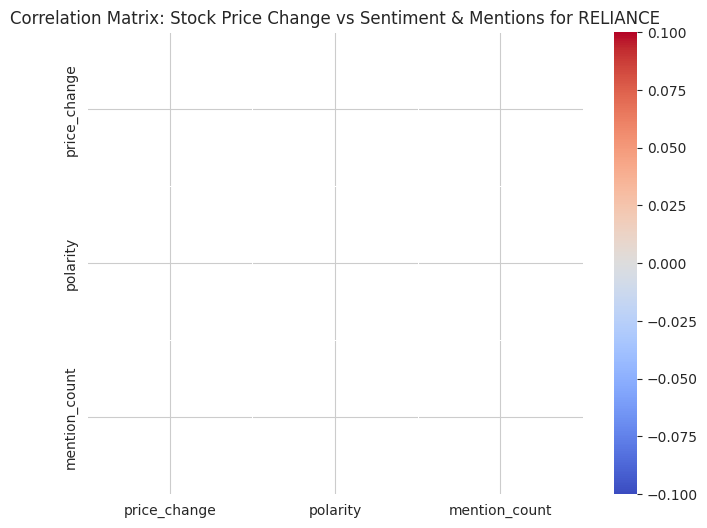

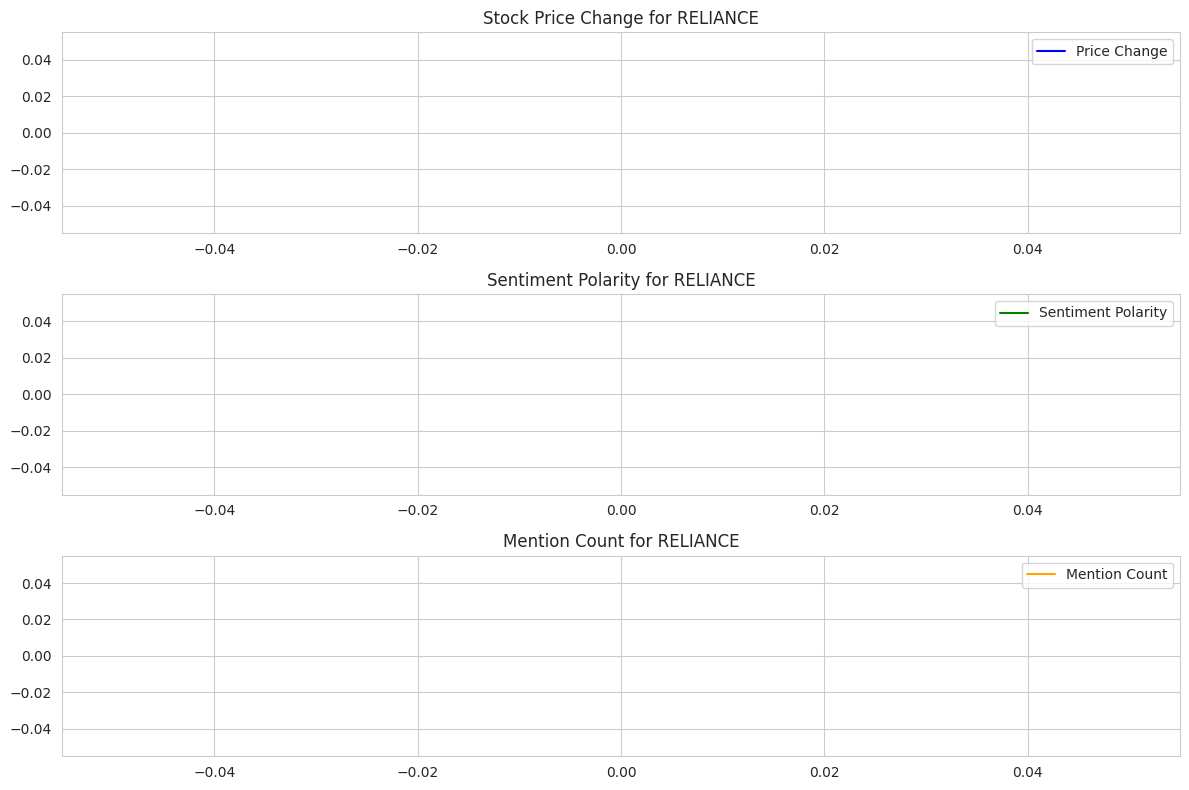

[*********************100%***********************]  1 of 1 completed

Processing data for TCS...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


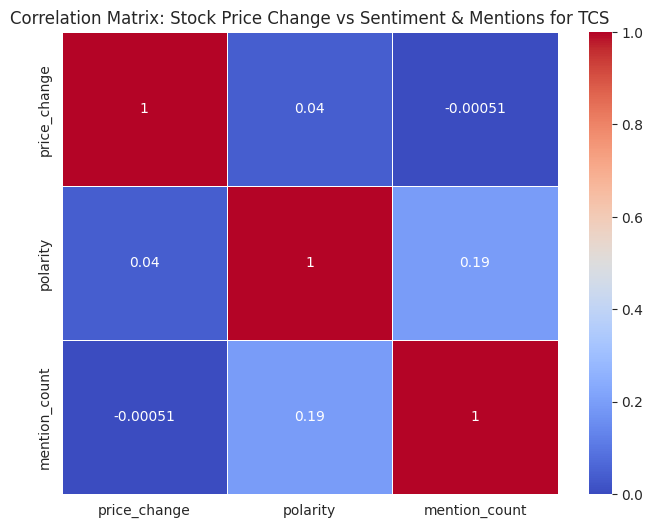

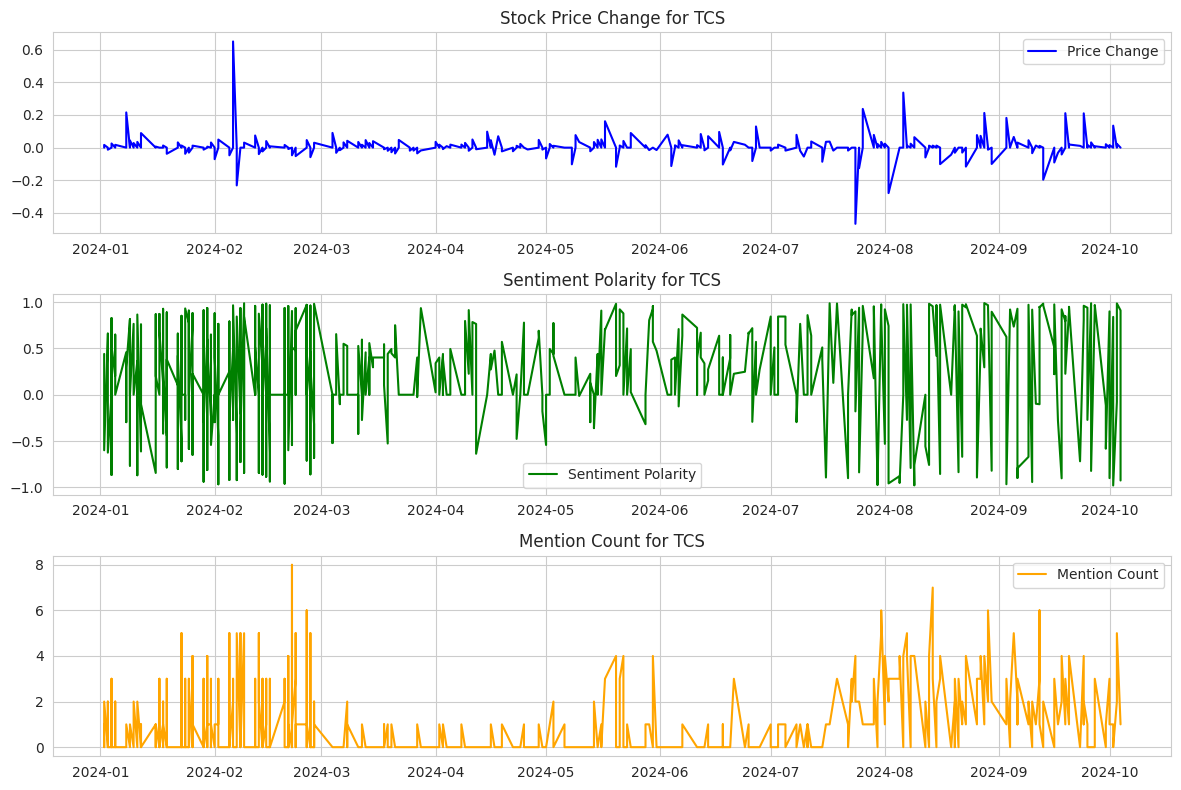

Processing data for VOW3...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOW3']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


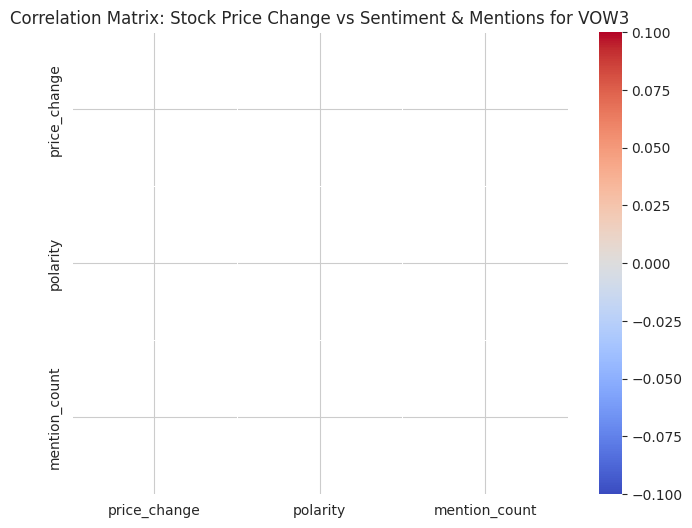

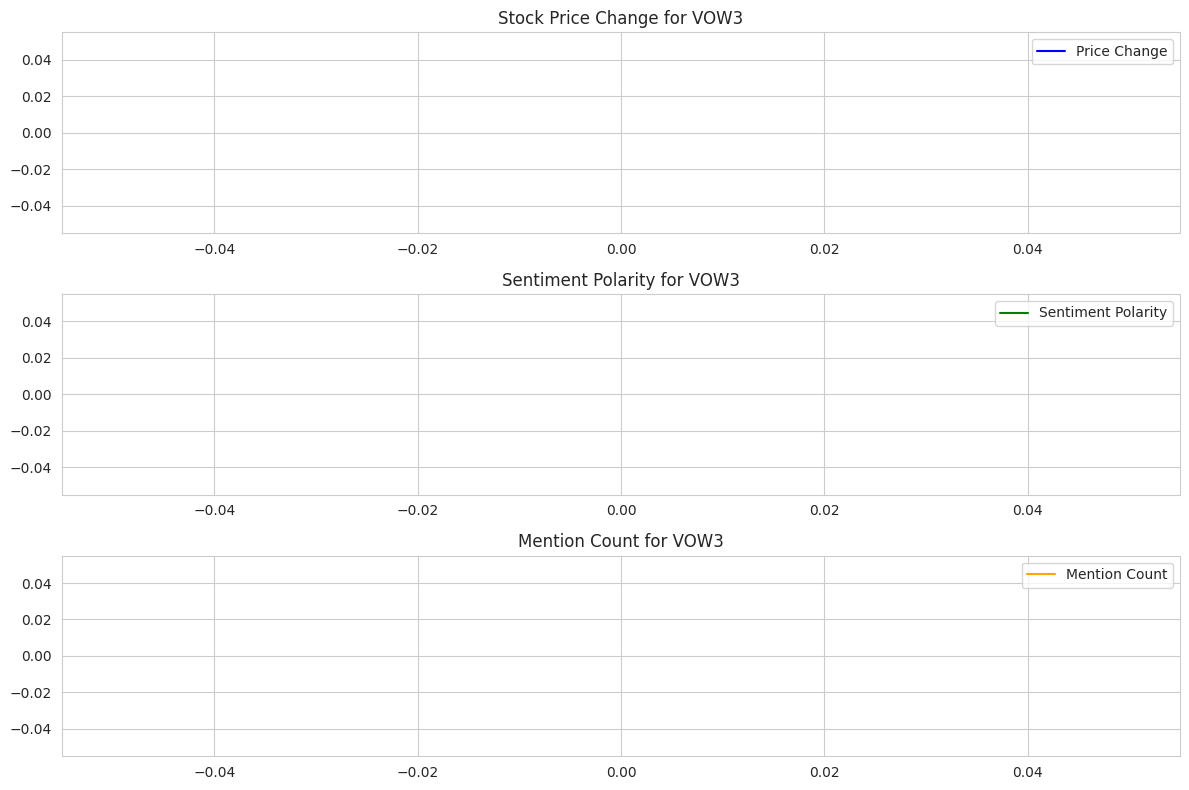

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BMW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-10-5)')


Processing data for BMW...


<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


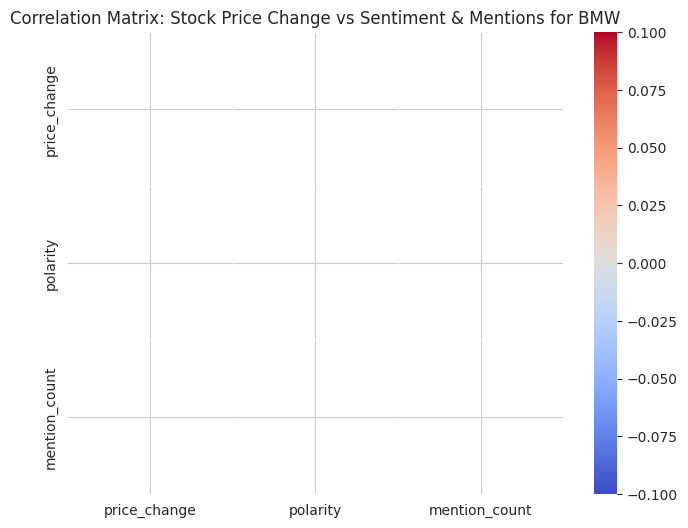

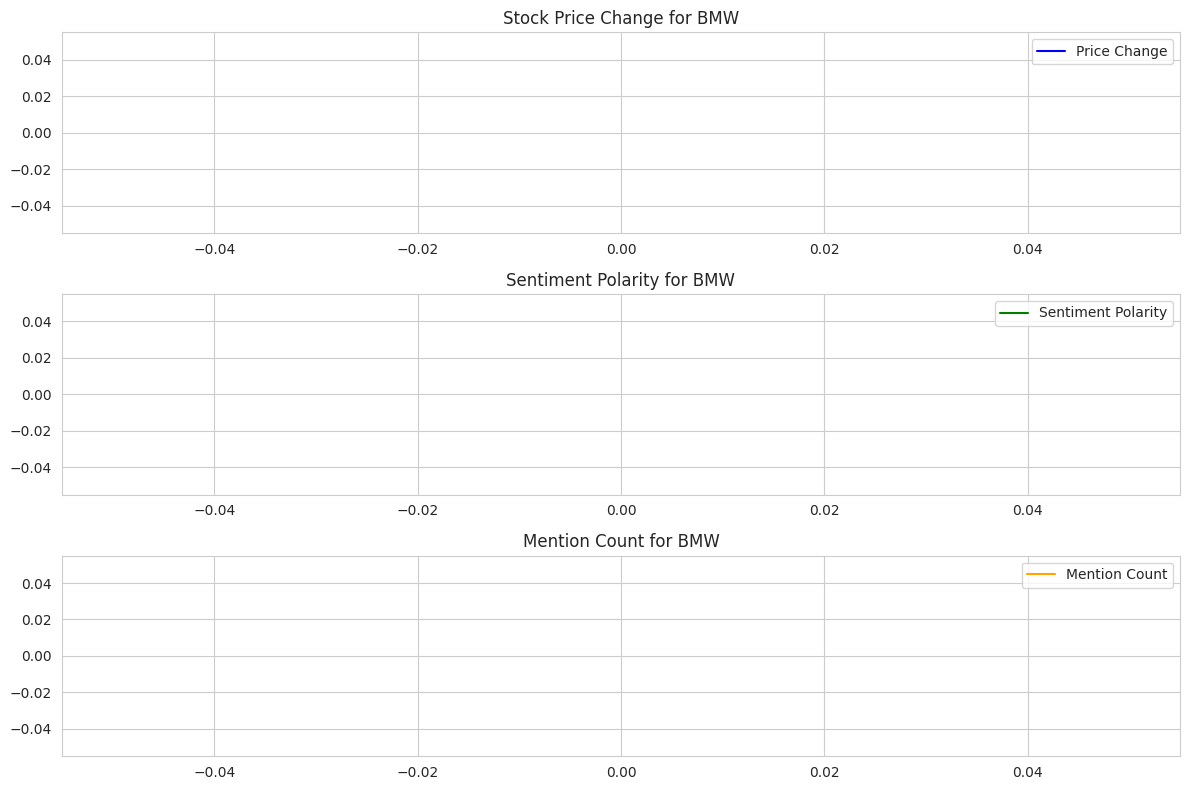

[*********************100%***********************]  1 of 1 completed

Processing data for NFLX...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


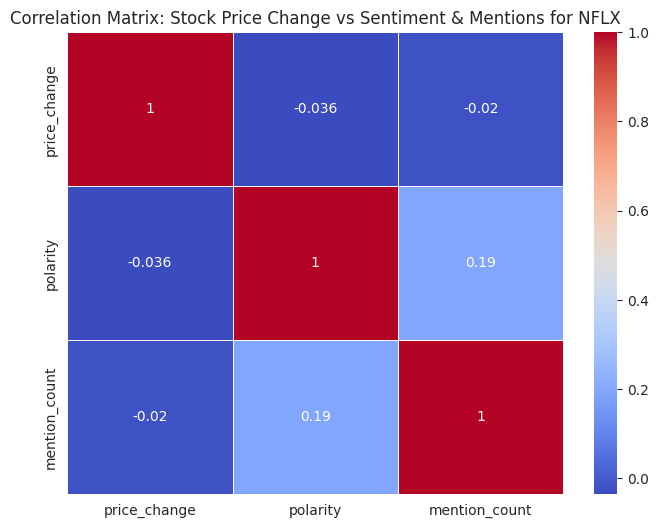

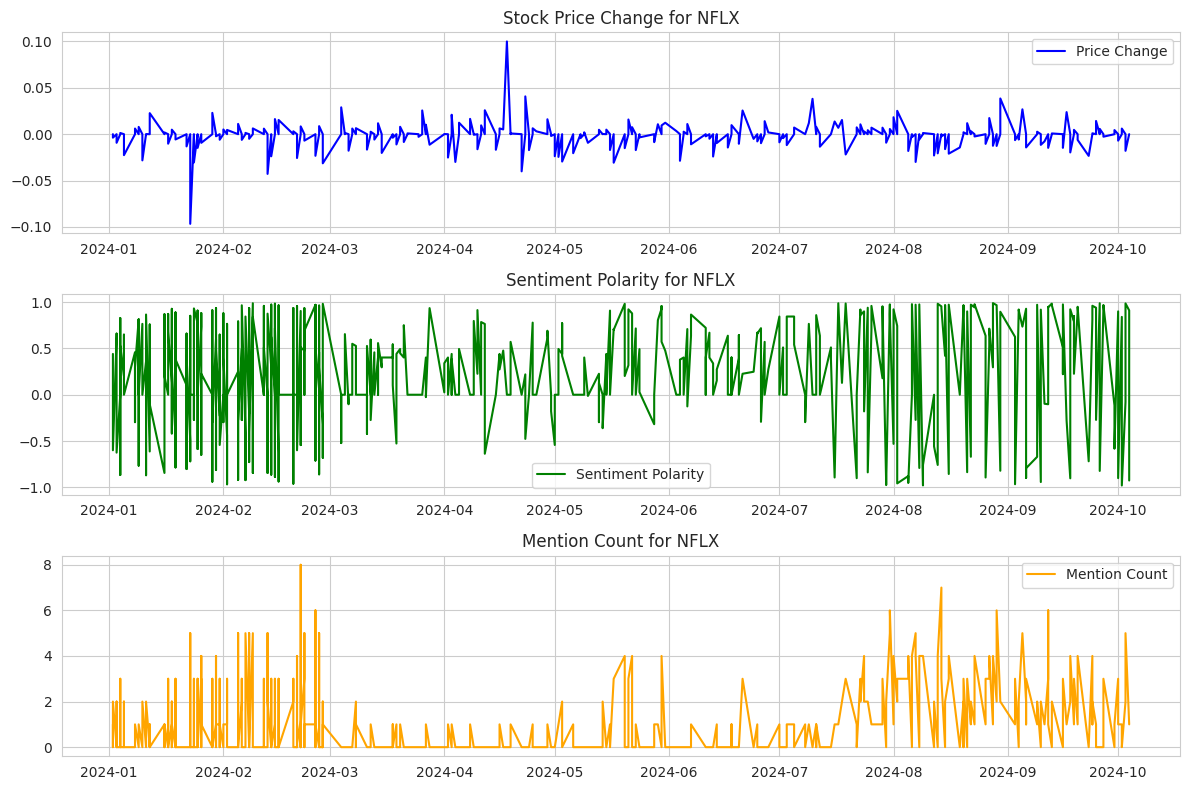

[*********************100%***********************]  1 of 1 completed

Processing data for PYPL...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


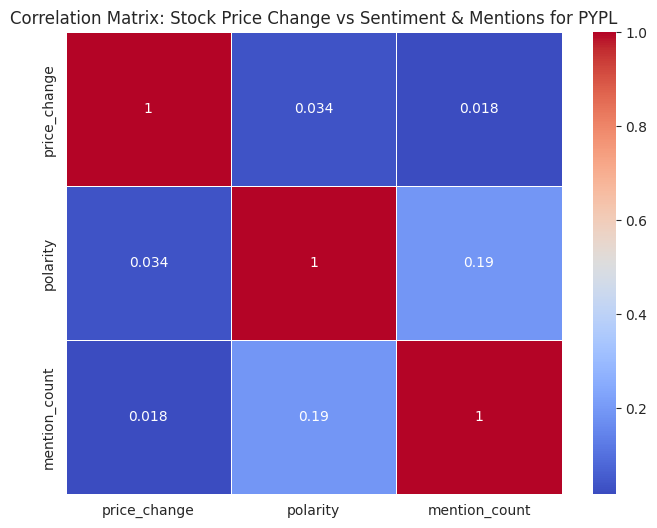

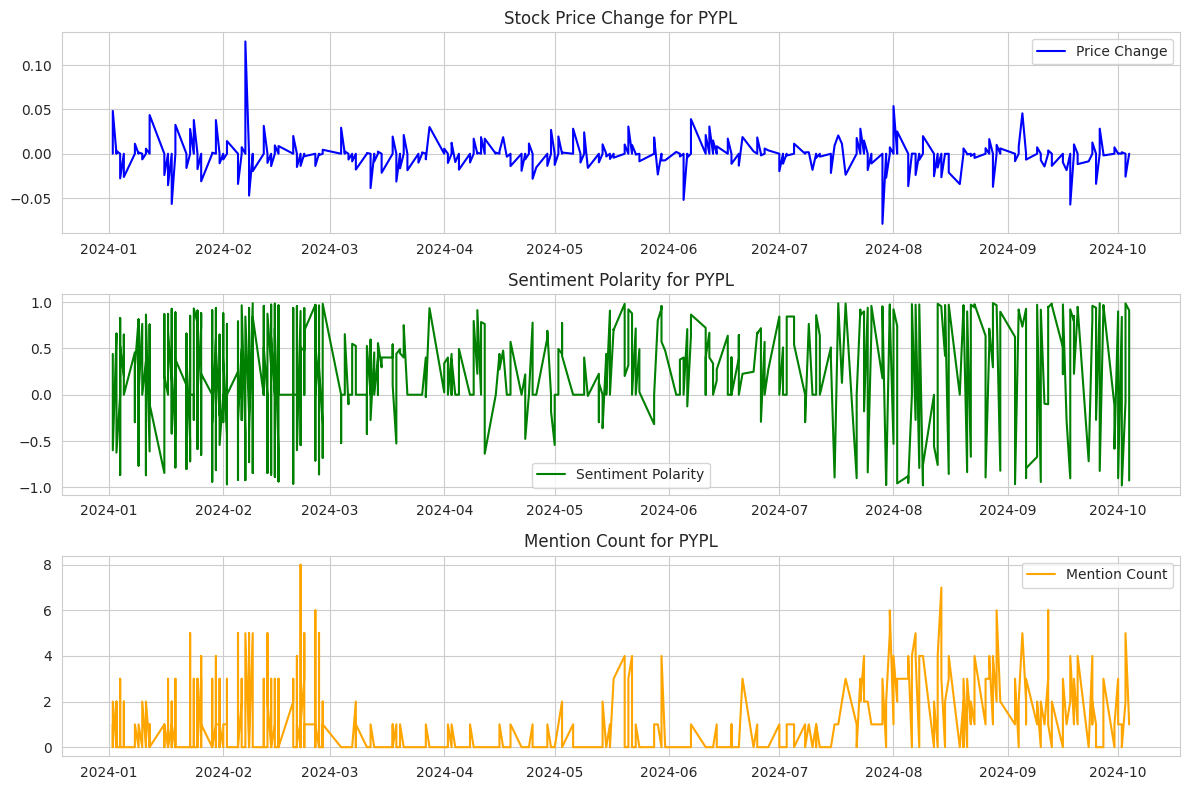

[*********************100%***********************]  1 of 1 completed

Processing data for NIO...



<ipython-input-15-4ca6f67771e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)


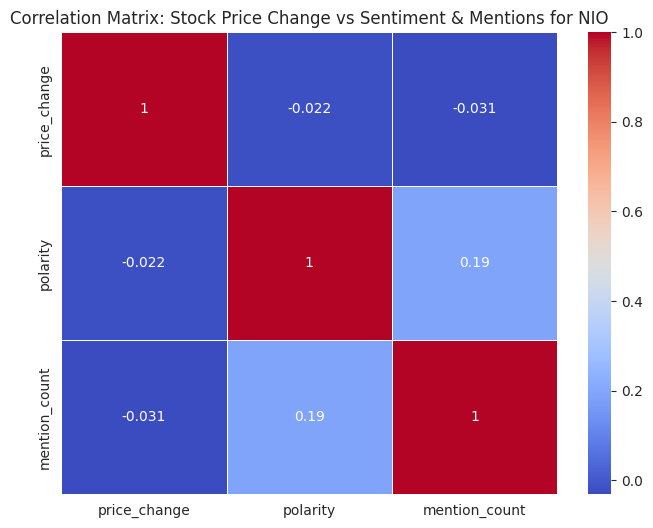

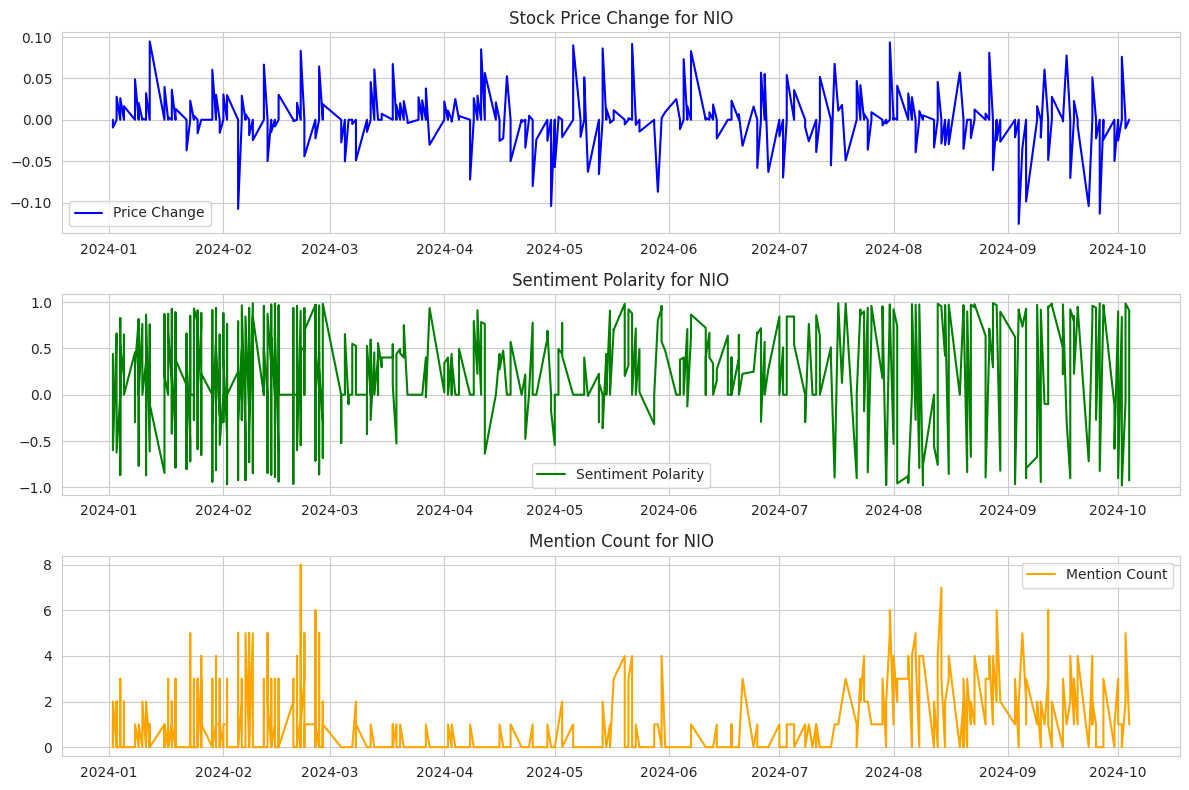

In [15]:
import yfinance as yf
# Define stock tickers of interest
stock_symbols = ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN', 'RELIANCE', 'TCS', 'VOW3', 'BMW', 'NFLX', 'PYPL', 'NIO']
# Calculate mention count from the 'mentions' column
df_messages['mention_count'] = df_messages['mentions'].apply(len)

# Loop through each stock symbol to fetch stock data, merge, and analyze
for stock_symbol in stock_symbols:
    print(f"Processing data for {stock_symbol}...")

    # Step 1: Fetch stock price data using yfinance
    stock_data = yf.download(stock_symbol, start='2024-01-01', end='2024-10-5')

    # Step 2: Clean and prepare stock price data
    stock_data = stock_data[['Adj Close']]  # Using the adjusted close price
    stock_data.rename(columns={'Adj Close': 'stock_price'}, inplace=True)

    # Step 3: Merge the stock price data with your sentiment data
    df_combined = pd.merge(df_messages, stock_data, how='inner', left_index=True, right_index=True)

     # Step 4: Calculate stock price changes (percentage)
    df_combined['price_change'] = df_combined['stock_price'].pct_change()

    # Step 5: Analyze correlations between stock price changes, sentiment, and mentions
    correlation_matrix = df_combined[['price_change', 'polarity', 'mention_count']].corr()

    # Step 6: Visualize the correlation matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f'Correlation Matrix: Stock Price Change vs Sentiment & Mentions for {stock_symbol}')
    plt.show()

    # Plot stock price movements, sentiment, and mentions over time
    plt.figure(figsize=(12,8))

    # Plot stock price changes
    plt.subplot(3, 1, 1)
    plt.plot(df_combined.index, df_combined['price_change'], color='blue', label='Price Change')
    plt.title(f'Stock Price Change for {stock_symbol}')
    plt.legend()

    # Plot sentiment polarity
    plt.subplot(3, 1, 2)
    plt.plot(df_combined.index, df_combined['polarity'], color='green', label='Sentiment Polarity')
    plt.title(f'Sentiment Polarity for {stock_symbol}')
    plt.legend()

    # Plot mention count
    plt.subplot(3, 1, 3)
    plt.plot(df_combined.index, df_combined['mention_count'], color='orange', label='Mention Count')
    plt.title(f'Mention Count for {stock_symbol}')
    plt.legend()

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


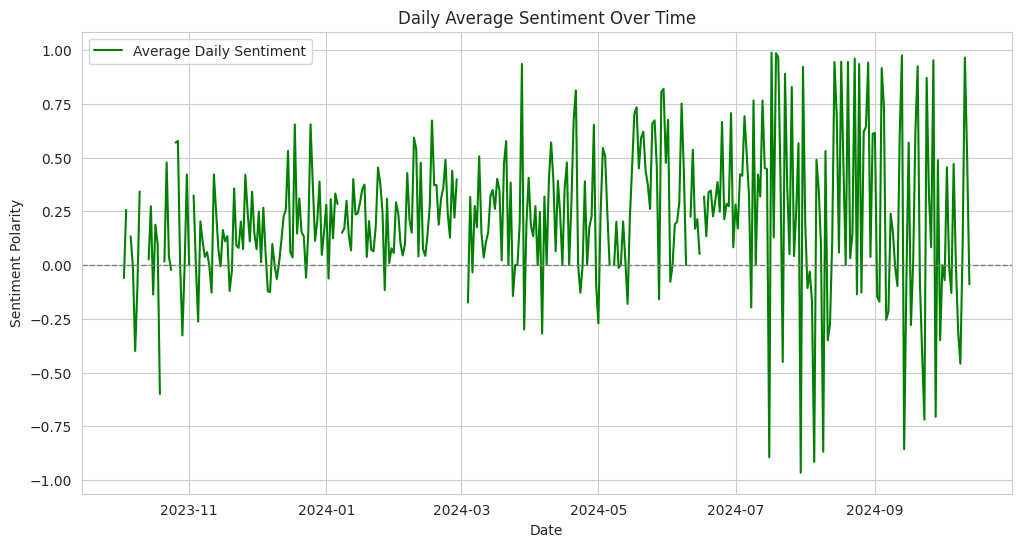

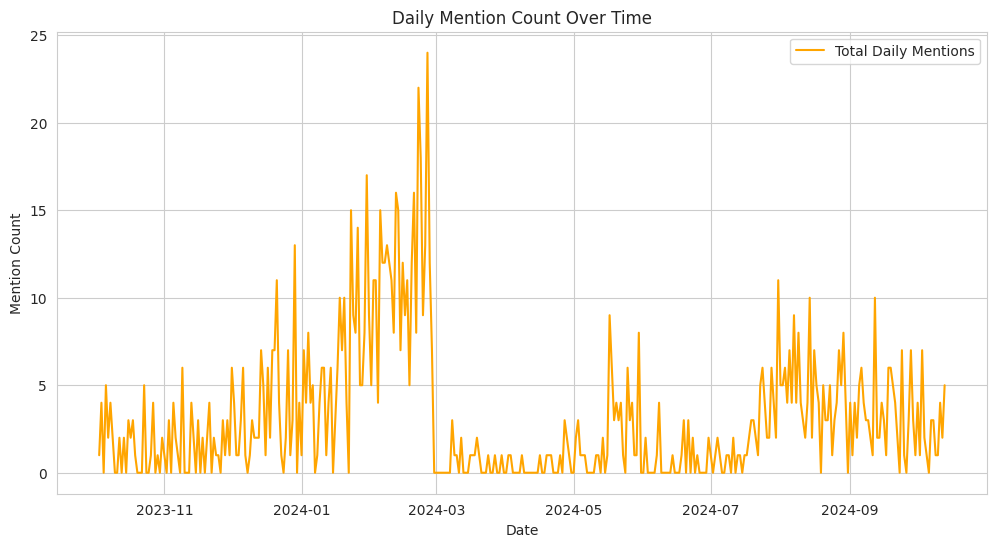

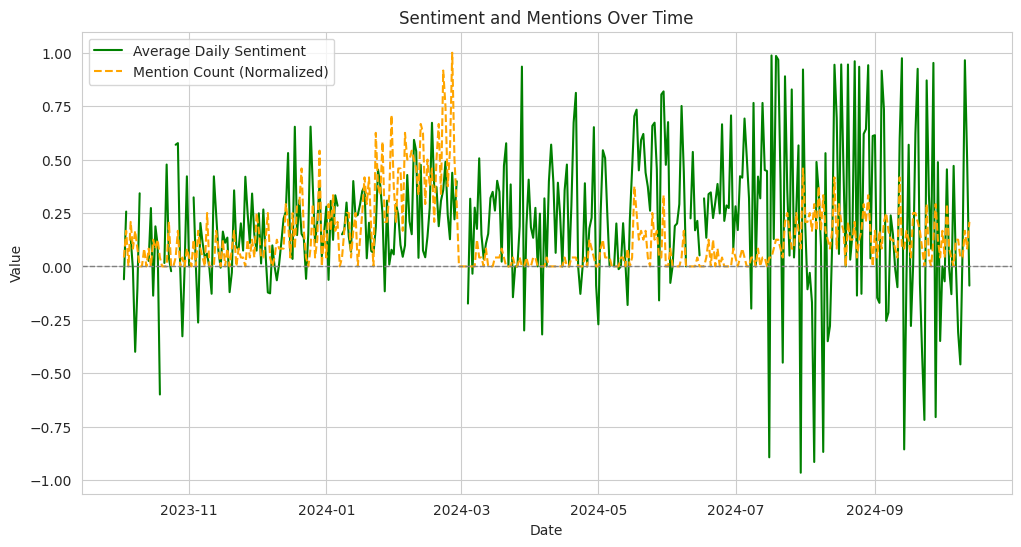

In [16]:
# Resample the data by day and compute the average sentiment and total mentions
df_daily_trends = df_messages.resample('D').agg({
    'polarity': 'mean',  # Average daily sentiment
    'mention_count': 'sum'  # Total daily mentions
})

# Visualization 1: Trends in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['polarity'], color='green', label='Average Daily Sentiment')
plt.title('Daily Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.axhline(0, color='gray', linestyle='--', lw=1)  # Line for neutral sentiment (0)
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Trends in mentions over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['mention_count'], color='orange', label='Total Daily Mentions')
plt.title('Daily Mention Count Over Time')
plt.xlabel('Date')
plt.ylabel('Mention Count')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Visualize both trends together
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['polarity'], color='green', label='Average Daily Sentiment')
plt.plot(df_daily_trends.index, df_daily_trends['mention_count'] / df_daily_trends['mention_count'].max(), color='orange', label='Mention Count (Normalized)', linestyle='--')
plt.title('Sentiment and Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.axhline(0, color='gray', linestyle='--', lw=1)  # Line for neutral sentiment (0)
plt.legend()
plt.grid(True)
plt.show()